# Santa Monica Airbnb Data Analysis
This is a notebook that contains an analysis of Airbnb data for LA that were compiled on Nov. 3, 2020, from http://insideairbnb.com/get-the-data.html
The focus of this analysis is on the city of Santa Monica, where I live and host Airbnb myself. We are particularly interested in price/availability/amenities information in this area, and how price/availability are related to different features of the properties. 

We would like to find ways (add more amenities, renovate our property, etc.) to improve our booking rate and (hopefully also) the price. In order to achieve this goal, the three questions I would like to ask in this analysis are:  
(1) How the price/availability relate to the room type and bath type?  
(2) What are the popular amenities offered by the hosts in Santa Monica?  
(3) What are the most influential features to estimate the price/availability of a listing?

First, import the needed libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest, f_regression
import math
%matplotlib inline

In [3]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201009145904,2020-10-25,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,10.0,10.0,10.0,NaN,t,2,0,2,0,0.35
2,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,9.0,10.0,9.0,228269,f,2,1,1,0,0.18
3,2864,https://www.airbnb.com/rooms/2864,20201009145904,2020-10-10,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,5729,https://www.airbnb.com/rooms/5729,20201009145904,2020-10-25,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,https://www.airbnb.com/users/show/9171,...,10.0,10.0,9.0,NaN,f,4,1,3,0,1.69


In [4]:
df.shape

(30533, 74)

So there are 30533 listings in LA in Nov, 2020, and there are 74 features. Let's take a look at the data type of these features.

In [5]:
df.dtypes.value_counts()

object     35
float64    22
int64      17
dtype: int64

In [6]:
# find the name of the columns which are objects data type
df.select_dtypes('O').columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable'],
      dtype='object')

In [7]:
# find the name of the columns which are float64 data type
df.select_dtypes('float64').columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [8]:
# find the name of the columns which are int64 data type
df.select_dtypes('int64').columns

Index(['id', 'scrape_id', 'host_id', 'accommodates', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

As mentioned, I want to focus on "Santa Monica" neighborhood. Thus in the following, I will select data from this particular neighborhood and name this new dataframe as "SantaM".

In [9]:
SantaM = df[df.neighbourhood_cleansed=='Santa Monica']
# make the index start with 0 for the new dataframe
SantaM.index=range(len(SantaM))
SantaM.shape

(1116, 74)

So there are 1116 listings in Santa Monica in Nov. 2020. Then let's see among these listings, how many values are missing for each feature.

In [10]:
pd.set_option('display.max_rows', 74)
SantaM.isnull().sum().sort_values(ascending=False)

bathrooms                                       1116
calendar_updated                                1116
license                                          571
neighborhood_overview                            431
neighbourhood                                    431
host_about                                       348
review_scores_location                           272
review_scores_checkin                            272
review_scores_communication                      272
review_scores_value                              272
review_scores_cleanliness                        271
review_scores_accuracy                           271
review_scores_rating                             268
last_review                                      263
first_review                                     263
reviews_per_month                                263
host_response_rate                               163
host_response_time                               163
host_acceptance_rate                          

It's good to find that most of the features to be considered in this analysis have zero or very few missing values. 

### Question 1
How the price/availability relate to the room type and bath type?  
From previous lines, we know that both "availability_30" and "price" features have no missing values (great).
One thing before we do further analysis is that "price" feature is an "object" type, instead of a "float" type, so we need to convert it first.

In [11]:
SantaM.price = SantaM.price.str.replace('$', '')
SantaM.price = SantaM.price.str.replace(',', '')
SantaM.price = SantaM.price.astype('float')

/Users/zhaoli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
SantaM.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    833
Private room       268
Shared room          9
Hotel room           6
Name: room_type, dtype: int64

In [13]:
SantaM.groupby(['room_type'])['availability_30'].mean().sort_values(ascending=False)

room_type
Hotel room         20.666667
Private room       13.074627
Shared room        11.333333
Entire home/apt    10.369748
Name: availability_30, dtype: float64

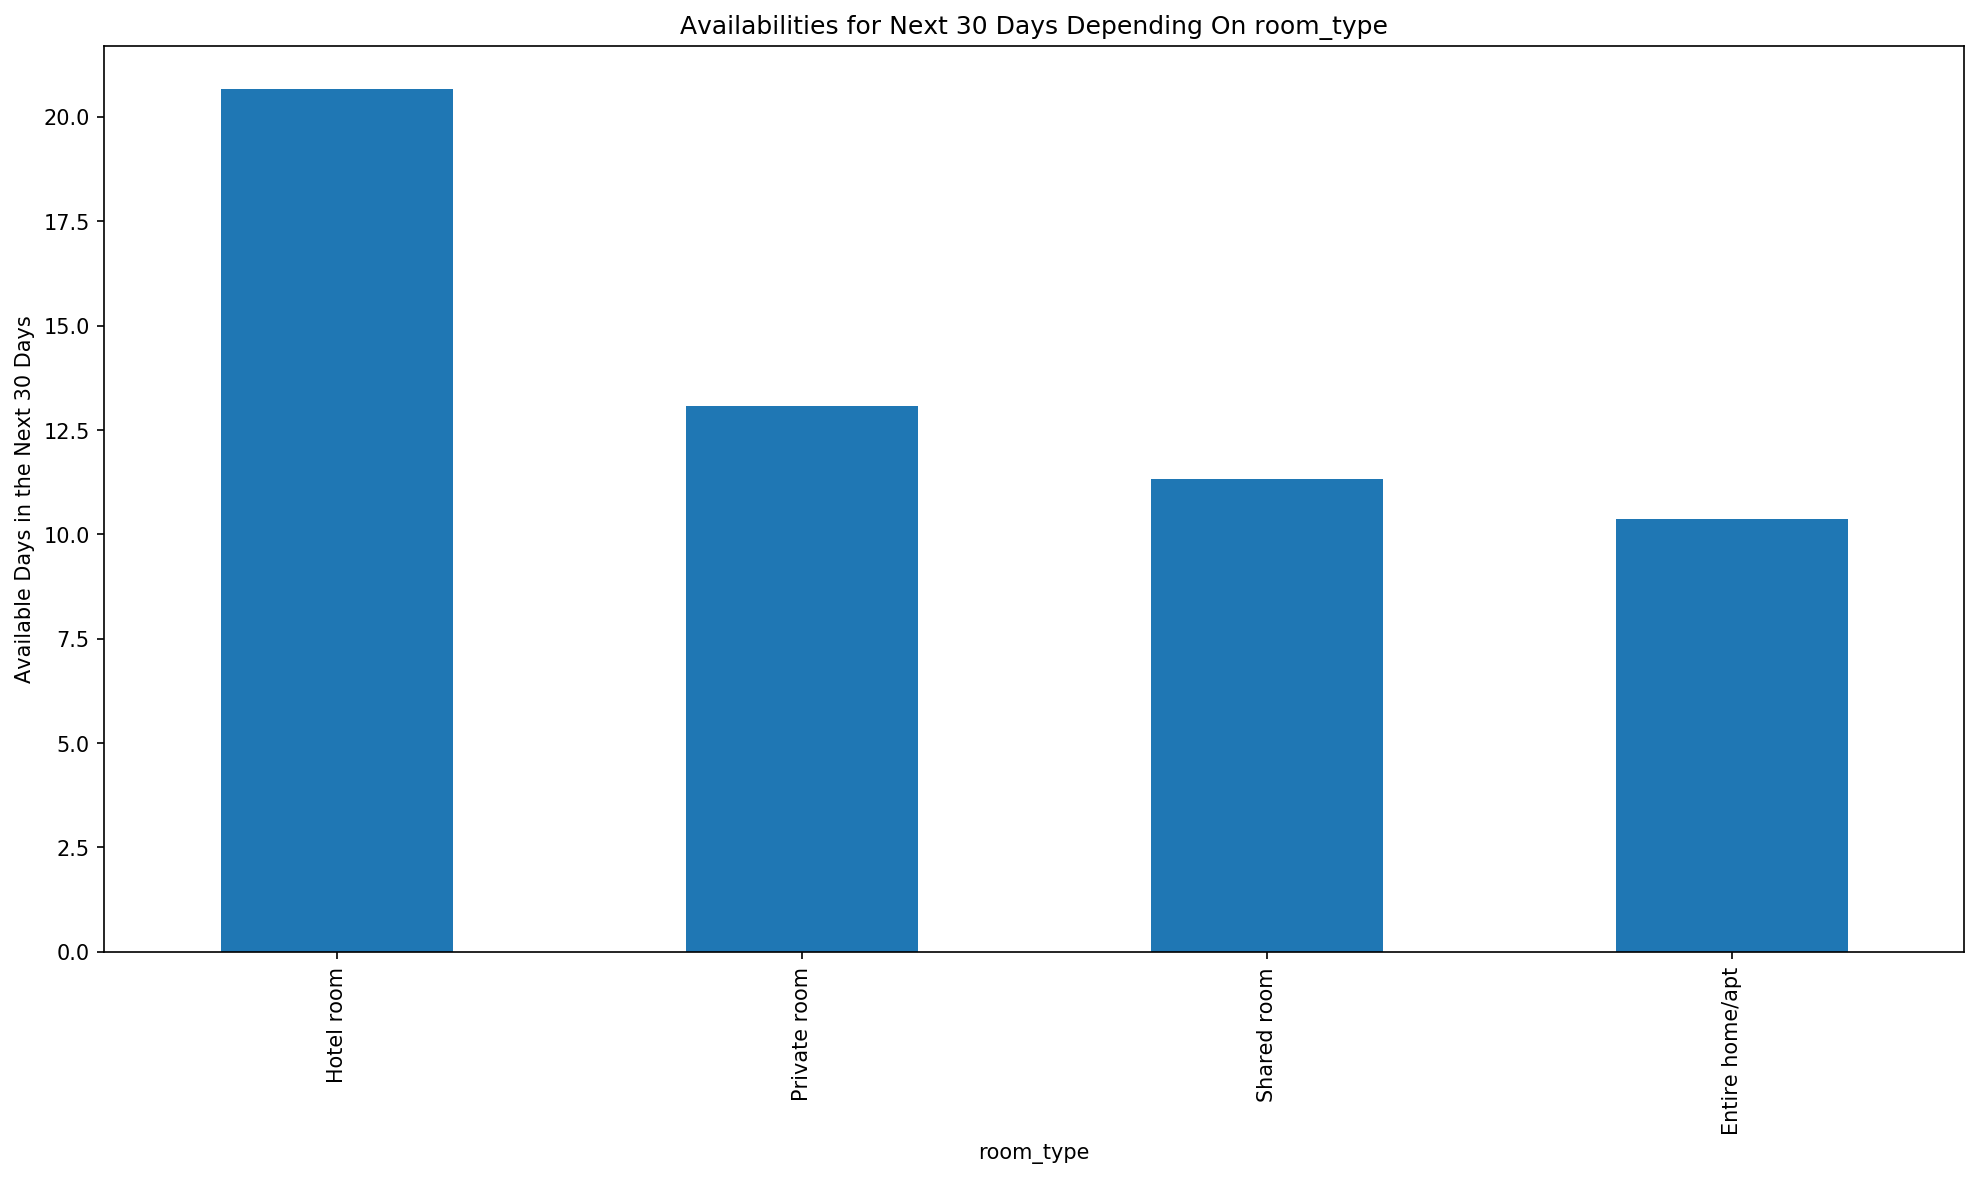

In [129]:
# Plot a bar chart to visualize availability of different room types for next 30 days
(SantaM.groupby(['room_type'])['availability_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Availabilities for Next 30 Days Depending On room_type')
plt.ylabel('Available Days in the Next 30 Days')
plt.rcParams['figure.figsize'] = [16, 8]
plt.show()

In [15]:
SantaM.groupby(['room_type'])['price'].mean().sort_values(ascending=False)

room_type
Hotel room         268.833333
Entire home/apt    204.181152
Private room       149.786231
Shared room        147.444444
Name: price, dtype: float64

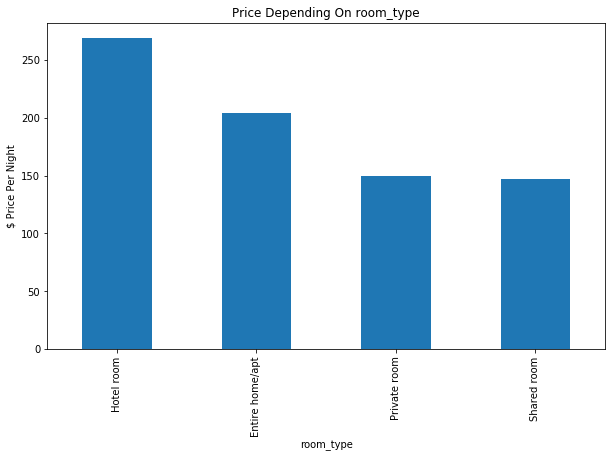

In [19]:
(SantaM.groupby(['room_type'])['price'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Price Depending On room_type')
plt.ylabel('$ Price Per Night')
#plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [20]:
SantaM.bathrooms_text.value_counts().sort_values(ascending=False)

1 bath               583
2 baths              191
1 private bath       134
1 shared bath         82
1.5 baths             38
2.5 baths             21
3 baths               21
1.5 shared baths      19
4 baths                7
2 shared baths         5
4.5 baths              4
3.5 baths              3
5 baths                2
Private half-bath      1
Shared half-bath       1
6 baths                1
2.5 shared baths       1
Name: bathrooms_text, dtype: int64

In [21]:
SantaM.groupby(['bathrooms_text'])['availability_30'].mean().sort_values(ascending=False)

bathrooms_text
6 baths              30.000000
Shared half-bath     29.000000
2.5 shared baths     23.000000
4.5 baths            20.250000
5 baths              19.000000
2 shared baths       18.000000
3.5 baths            17.666667
4 baths              16.428571
2.5 baths            15.904762
2 baths              14.664921
1 private bath       12.828358
1 shared bath        12.243902
3 baths              12.142857
1.5 baths            10.210526
1.5 shared baths      9.631579
1 bath                8.907376
Private half-bath     2.000000
Name: availability_30, dtype: float64

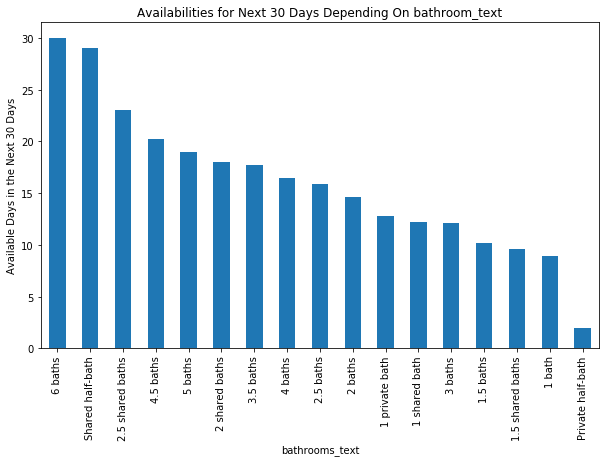

In [22]:
(SantaM.groupby(['bathrooms_text'])['availability_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Availabilities for Next 30 Days Depending On bathroom_text')
plt.ylabel('Available Days in the Next 30 Days')
#plt.rcParams['figure.figsize'] = [16, 8]
plt.show()

In [23]:
SantaM.groupby(['bathrooms_text'])['price'].mean().sort_values(ascending=False)

bathrooms_text
4.5 baths            1843.750000
6 baths              1700.000000
4 baths              1117.142857
3.5 baths            1033.333333
5 baths               567.500000
3 baths               452.081429
2.5 baths             329.212857
2 baths               245.146597
1 private bath        181.850746
1.5 baths             165.710526
1 bath                150.336930
1 shared bath         104.353659
Shared half-bath      100.000000
2.5 shared baths       99.000000
Private half-bath      85.000000
2 shared baths         72.000000
1.5 shared baths       64.421053
Name: price, dtype: float64

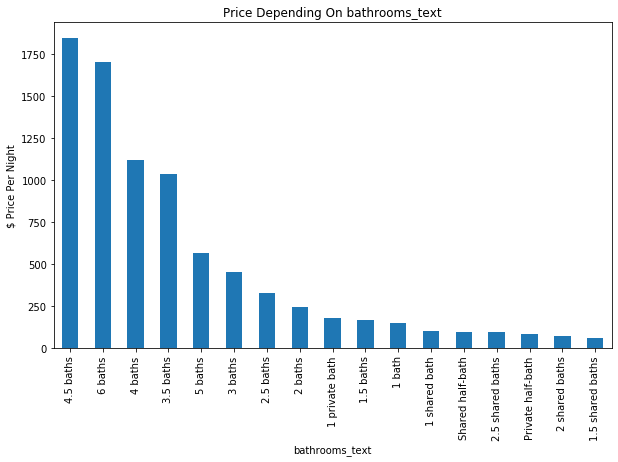

In [24]:
(SantaM.groupby(['bathrooms_text'])['price'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Price Depending On bathrooms_text')
plt.ylabel('$ Price Per Night')
plt.rcParams['figure.figsize'] = [16, 8]
plt.show()

From these two plots, it's clear that although shared and private bathroom does not affect the availability very much, properties with private bathrooms have higher listing price on average than properties with shared bathrooms. This may be especially true durinng the pandemic (so one of my future practice will be to dig out archived data and see how much difference there is between private and shared bath before the pandemic).

### Question 2
Since it requires renovation (including HOA/city permit) to change the type of the room and bathroomm, let's take a look at whether addditional amenities will increase booking rate and price. What are the popular amenities offered by the hosts in Santa Monica? To answer this question, we need to first break the amenities text into individual amenity.

In [41]:
# break the amenities descriptions into individual amenity
amenities_list = list(SantaM.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('"', '')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_set = [x.strip() for x in amenities_list_string.split(',')] 

In [74]:
# count the frequency of individual amenity
from collections import Counter
temp = dict(Counter(amenities_set))
a_count = pd.DataFrame.from_dict(temp,orient='index',columns=['count'])
a_count.sort_values("count",ascending=False,inplace=True)

In [82]:
a_count.index

Index(['Wifi', 'Essentials', 'Smoke alarm', 'Heating', 'Hangers', 'TV',
       'Hair dryer', 'Kitchen', 'Iron', 'Carbon monoxide alarm',
       ...
       '47\ HDTV with Netflix', 'Puracy plant based and natural body soap',
       'Trader Joes shampoo/body wash combo body soap',
       'Trader Joes shampoo/body wash combo shampoo',
       'Trader Joes conditioner', 'Wifi \u2013 500 Mbps',
       'large toster oven oven', 'various body soap',
       'Free carport on premises \u2013 1 space',
       'Free parking garage on premises'],
      dtype='object', length=177)

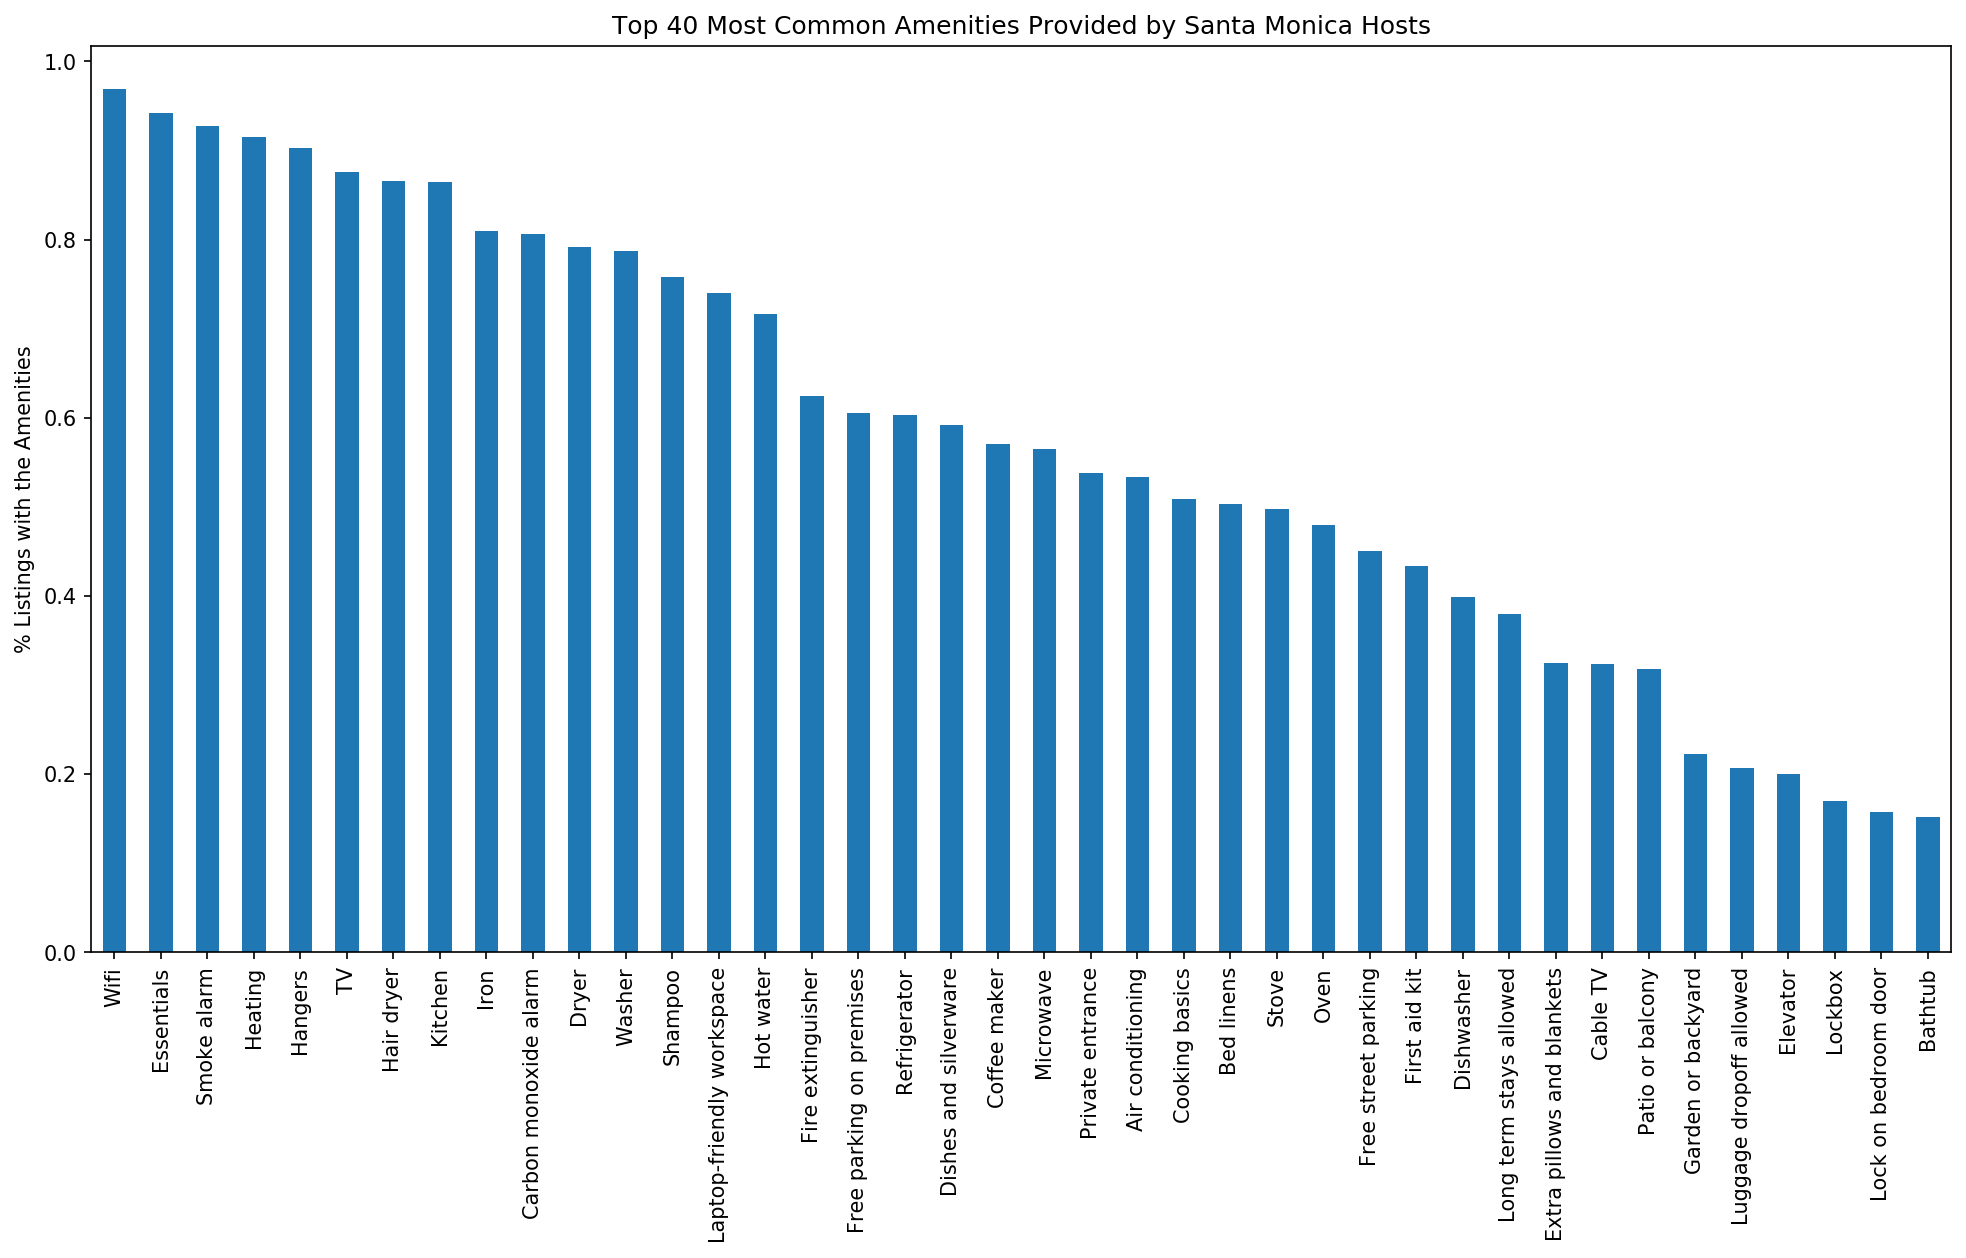

In [110]:
#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
top = 40
(a_count/len(SantaM))[:top].plot(kind='bar', legend=None);
plt.title('Top {} Most Common Amenities Provided by Santa Monica Hosts'.format(top));
plt.ylabel('% Listings with the Amenities')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 150
plt.show()

In [132]:
(a_count/len(SantaM))[:1]

,count
Wifi,0.968638


From the plot, it's clear that more than 80% of the listings in Santa Monica are equipped with Wifi (96.9%), Essentials, Smoke alarm, Heating, Hangers, TV, and Kitchen. More than 60% of the listings are also equipped with Hair dryer, Iron, CO alarm, Dryer/Washer, Shampoo, Laptop-friendly workspace, and Hot water. 

### Question 3
What are the most influential features to estimate the price/availability of a listing?

In [111]:
top = 40
for i in range(top):
    SantaM[a_count.index[i]] = 0
for i in range(top):
    for t in range(len(SantaM)):
        if a_count.index[i] in SantaM.amenities[t]:
            SantaM.loc[t, a_count.index[i]] = 1
        else:
            SantaM.loc[t, a_count.index[i]] = 0

/Users/zhaoli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhaoli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


First let's take a look at the availability data. We want to find out the amenities that can increase the booking rate (i.e., have lower availability in the coming 30 days).

In [116]:
a_importance = pd.DataFrame(index=range(0,top), columns = ["Amenity_Name", "Availability_30 for HAVING the Amenity", "Availability_30 for NOT HAVING the Amenity", "Availability Difference"])

In [118]:
for i in range(top):
    a_importance['Amenity_Name'][i] = a_count.index[i]
    a_importance['Availability_30 for HAVING the Amenity'][i] = SantaM.groupby([a_count.index[i]])['availability_30'].mean()[1]
    a_importance['Availability_30 for NOT HAVING the Amenity'][i] = SantaM.groupby([a_count.index[i]])['availability_30'].mean()[0]
    a_importance['Availability Difference'][i] = a_importance['Availability_30 for HAVING the Amenity'][i] - a_importance['Availability_30 for NOT HAVING the Amenity'][i]

In [120]:
a_importance.sort_values('Availability Difference')

,Amenity_Name,Availability_30 for HAVING the Amenity,Availability_30 for NOT HAVING the Amenity,Availability Difference
0,Wifi,10.8504,18.697,-7.84655
1,Essentials,10.7279,16.8154,-6.08751
4,Hangers,10.7289,14.3486,-3.61973
8,Iron,10.5996,13.1415,-2.54195
6,Hair dryer,10.7702,13.0933,-2.32315
24,Bed linens,9.96619,12.2148,-2.24861
17,Refrigerator,10.2838,12.2957,-2.01191
12,Shampoo,10.6057,12.5836,-1.97798
19,Coffee maker,10.2449,12.1962,-1.95134
18,Dishes and silverware,10.3041,12.2132,-1.9091


It's clear that Wifi, Essentials, Hangers, Iron, Hair dryer, Bed linens and Refrigerator are the amenities that help increase the booking rate. Now let's take a look at whether they also help increase the price of the listing.

In [125]:
a_importance_p = pd.DataFrame(index=range(0,top), columns = ["Amenity_Name", "Price for HAVING the Amenity", "Price for NOT HAVING the Amenity", "Price Difference"])

for i in range(top):
    a_importance_p['Amenity_Name'][i] = a_count.index[i]
    a_importance_p['Price for HAVING the Amenity'][i] = SantaM.groupby([a_count.index[i]])['price'].mean()[1]
    a_importance_p['Price for NOT HAVING the Amenity'][i] = SantaM.groupby([a_count.index[i]])['price'].mean()[0]
    a_importance_p['Price Difference'][i] = a_importance_p['Price for HAVING the Amenity'][i] - a_importance_p['Price for NOT HAVING the Amenity'][i]

In [128]:
a_importance_p.sort_values('Price Difference', ascending=False)

,Amenity_Name,Price for HAVING the Amenity,Price for NOT HAVING the Amenity,Price Difference
22,Air conditioning,225.319,151.825,73.4949
36,Elevator,240.335,178.691,61.6442
9,Carbon monoxide alarm,201.073,149.072,52.0013
16,Free parking on premises,206.952,166.605,40.3466
5,TV,195.173,159.962,35.2113
2,Smoke alarm,193.319,161.489,31.8304
39,Bathtub,212.537,187.167,25.3704
28,First aid kit,203.988,181.069,22.9193
32,Cable TV,204.333,184.638,19.6957
10,Dryer,193.456,180.983,12.4733


It's interesting to see that in term of price, the most "helpful" amenities are AC, Elevator, CO alarm, Free parking on premises, TV, Smoke alarm, Bathtub, and First aid kit. None of the previously found "helpful" features for booking rate appears here. Based on my own observation, many travelers who come to Santa Monica are for short-term study and working (internship), so more basic amenities (such as Wifi, Essentials, Hangers and Refrigerator) help them settle down in this area at lower cost, while more upgraded amenities (such as AC, Elevator and Bathtub) do not help a listing become more popular likely because they increase the price. The results I found in answering Question 3 seem to support my observations. 